
======================================================================================================================================================================================================================================
# <center>Airbnb Hosting Strategies in NYC 2019</center>


### <center>Name  : Catherine Helenna Mulyadi</center>


<center>This program analyzes the room type popularity in New York City based on listing availability. The insights generated will inform hosting strategies to enhance Airbnb's performance by identifying potential markets for new listings.</center>


======================================================================================================================================================================================================================================


## I. PROBLEM IDENTIFICATION

### 1. **THEME**

##### <center>IMPROVING AIRBNB HOSTING STRATEGIES THROUGH IN-DEPTH ROOM TYPE ANALYSIS</center>


### 2. **PROBLEM STATEMENT**

Investigate the popularity of Airbnb room types in New York City, specifically those with an availability of less than 120 days. Analyze room types, neighborhood variances, and pricing influences on the minimum booking duration for guests, with the goal of completing the study within a one-month timeframe.

### 3. **BACKGROUND**

With the increasing number of accessible transportation modes for travelling, the demand of accommodation is also rising since the last decade. Thanks to this phenomenon, one of the well-known accommodation provider service companies, Airbnb,is gaining more hosts as well as guests. Airbnb would like to expand its reach on potential locations in New York City so the company is interested to find out what kind of room type is currently popular in terms of annual availability and ownership.<br>

As a data analyst working in Airbnb, you need to figure out how to obtain those information from a provided Airbnb dataset in New York City in 2019. By finding those information, you can give insight to the company about the next hosting strategies to fulfill the demand better.

### 4. **PROBLEM DESCRIPTION**

**A.Room Availability and Type Analysis**

1. Which neighbourhood group is most popular based on average availability of room in a year? (lower average = more bookings = more popular)  
 Are there any significant differences of room availability among the neighbourhood groups? (ANOVA TEST)
2. How is the distribution of popular Airbnb rooms in each neighbourhood?
3. What are the proportions of room types available on Airbnb?
4. How many nights do customers usually stay in Airbnb based on room types?

**B.Room Prices Analysis**

5. How are the prices of all rooms in each neighbourhood groups and check outliers?  
 Are there any significant differences of prices among the neighbourhood groups? (ANOVA Test)
6. How is the relationship between the Airbnb price and the minimum booked nights? (Pearson Test)

**B.Customer Review Analysis**

7. What is the relationship between the number of reviews to room availability? 
8. Who are the top 5 hosts with most reviews? In which neighborhoods are they located?


## 2. DATA LOADING PROCESS

In [53]:
# Import libraries
# for data loading and cleaning
import pandas as pd
import numpy as np

# for EDA and visualizations
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import squarify


In [3]:
# data loading
# you can replace the filepath name according to your dataset file path
main_df = pd.read_csv('AB_NYC_2019.csv')

# show the first 5 data
main_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### **RAW DATA UNDERSTANDING:**
- The data contains various information related to Airbnb hosts in New York City for 2019.

- The Airbnb host information include 'host_id' and 'host_name' while the Airbnb's identity such as 'id', 'name', 'room_type', and 'price'. Furthermore, details about Airbnb location are shown by 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude'.

- Other supporting data related to Airbnb's host performance are classified into different columns as described below:
    - 'number_of_reviews',
    - 'last_review',
    - average reviews received per month ('review_per_month'),
    - how many properties the host has listed on Airbnb ('calculate_host_listings_count'), and
    - availability of room throughout the year ('availability_365').

In [4]:
# check if there are some null values and data type is correct before further processing
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# check the number of null data in each column
main_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### **INSIGHT:**
- There are total of 48895 data in most columns except several columns: 'name' (48879), 'host_name' (48874), 'last_review' and 'reviews_per_month' (38843).
- When checking null values in each column, 'name' and 'host_name' has 0 data. This result indicates mixed data type.
- If the 'number_of_reviews' is equal to 0, then 'last_review' and 'reviews_per_month' is 0. 
- If the price <= 0, it's an invalid data since you wouldn't rent Airbnb for free or pay to the guest.

## 3. DATA CLEANING


### **1. Make a copy of original data before data manipulation and cleaning:**

In [6]:
# make a new dataset
clean_df = main_df.copy()
# reset the index
clean_df.reset_index(drop = True, inplace = True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### **2. Perform data cleaning:**
    i. change inconsistent data type in name and host_name
    ii. drop last_review since it will not be used in EDA.
    iii. insert substitute value (0) of NaN in reviews_per_month
    iv. drop data where price < 0


In [7]:
# change data type for name and host_name
clean_df.name.fillna('unknown',inplace = True)
clean_df['name'].astype(str)
clean_df.host_name.fillna('unknown',inplace = True)
clean_df['host_name'].astype(str)

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

In [8]:
# fill NaN with 0
# drop column 'last_review'
clean_df = clean_df.drop('last_review', axis = 1)
# column 'reviews_per_month'
clean_df.reviews_per_month.fillna(0,inplace = True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [9]:
# exclude data with the Airbnb's price <= 0
clean_df = clean_df[(clean_df['price'] > 0)]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48884 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48884 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  reviews_per_month               48884

In [10]:
# convert to csv file
clean_df.to_csv('main data.csv')

#### **INSIGHT:**

- There are 48847 clean data which will be analyzed further and processed into visualizations.

- The cause of NaN values in review related columns can be solved by implementing logic if number_of_reviews == 0, then reviews_per_month == 0 and last_review == 'no reviews yet'. The column 'last_review' is irrelevant to fulfill purpose in SMART GOAL section so it will be removed.

- Now the data is ready for use.

## 4. Exploratory Data Analysis

`Purpose`: to get insights by answering questions in the "Problem Description" section.


### **A.Room Availability and Type Analysis**

#### 1a. Which Neighbourhood Group Is Popular For Booking Based On Average Room Availability?

In [11]:
# make a copy of cleaned dataframe in a new variable called popular_roomtype
popular_roomtype = clean_df.copy()

popular_roomtype = popular_roomtype.sort_values(by='neighbourhood_group', ascending=True)

# create popular_roomtype dataframe from filtering and name the mean availability_365 as average_availability
popular_roomtype  = pd.DataFrame(popular_roomtype.groupby(['room_type','neighbourhood_group'])['availability_365'].mean().round(2).reset_index(name='average_availability'))


popular_roomtype

,room_type,neighbourhood_group,average_availability
0,Entire home/apt,Bronx,158.00
1,Entire home/apt,Brooklyn,97.21
2,Entire home/apt,Manhattan,117.15
3,Entire home/apt,Queens,132.27
4,Entire home/apt,Staten Island,178.07
5,Private room,Bronx,171.40
6,Private room,Brooklyn,99.91
7,Private room,Manhattan,101.85
8,Private room,Queens,149.22
9,Private room,Staten Island,226.36


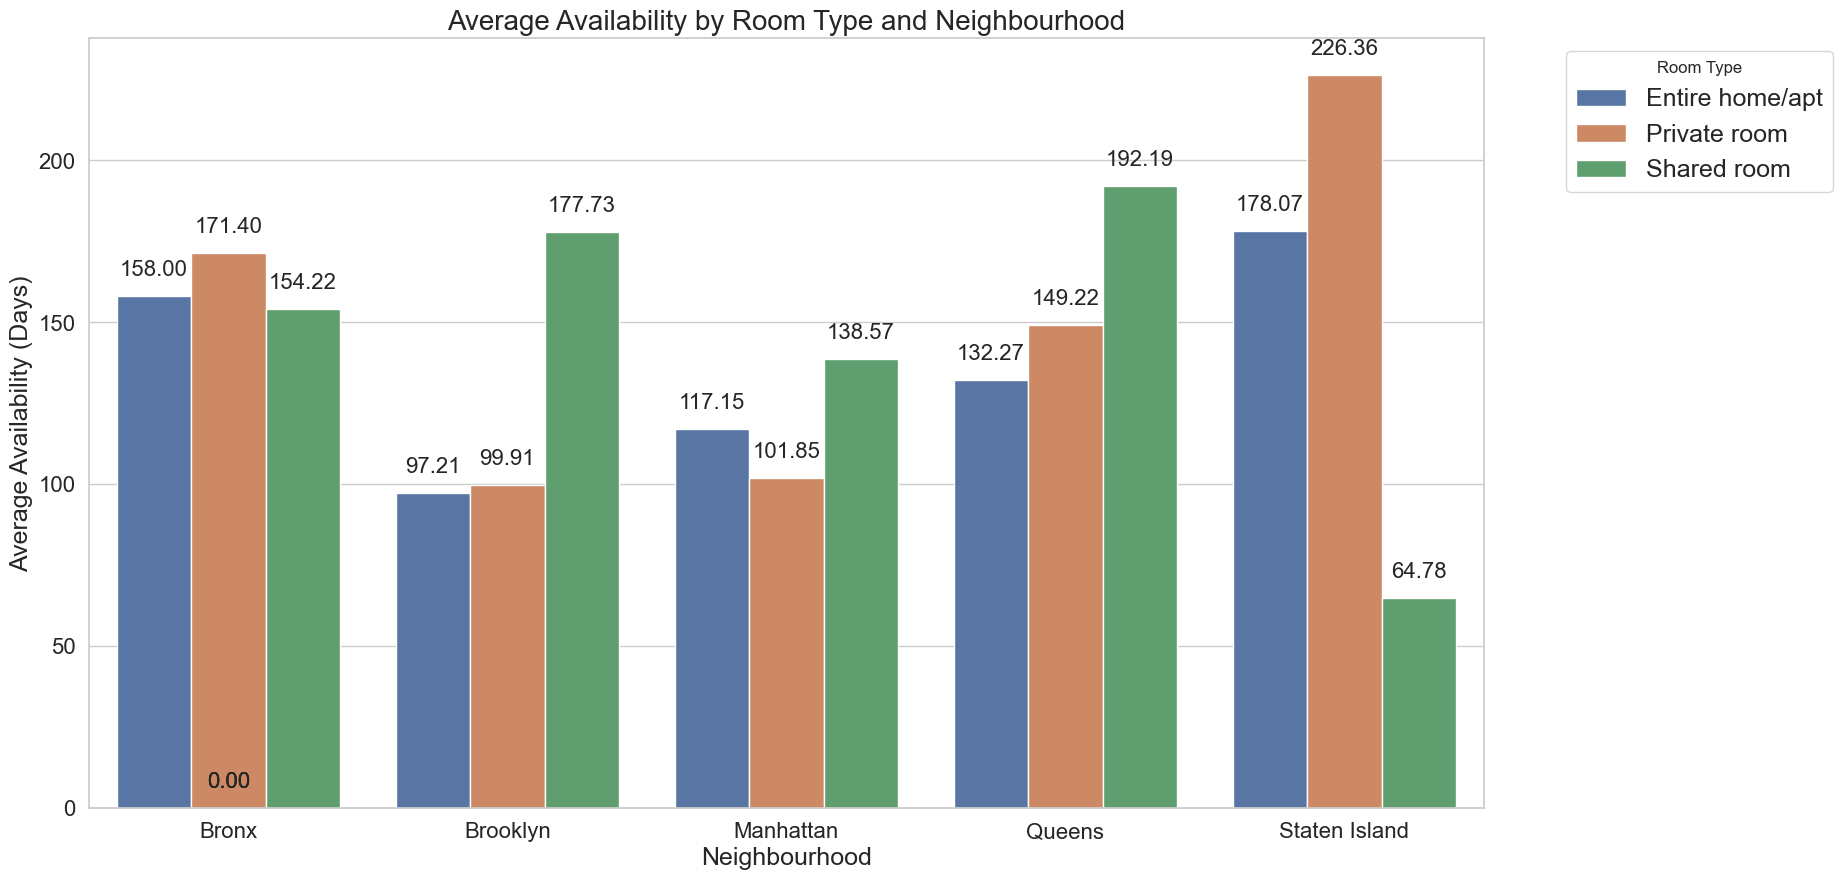

In [12]:
# Set the style when using seaborn
sns.set(style="whitegrid")

# Combine data for all neighborhoods into one DataFrame
combined_data = popular_roomtype.reset_index()

# Set up the figure size
plt.figure(figsize=(18, 10))

# Plot the bar graph for all neighborhoods
ax = sns.barplot(x='neighbourhood_group', y='average_availability', hue='room_type', data=combined_data)

# Set font size for axis labels
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Labelling values on bar graph
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 5, f'{height:.2f}', ha='center', va='bottom', fontsize = 16)

# Labelling the graph
plt.title('Average Availability by Room Type and Neighbourhood', fontsize = 20)
plt.xlabel('Neighbourhood', fontsize = 18)
plt.ylabel('Average Availability (Days)', fontsize = 18)
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 18)
# Show final plot
plt.show()

#### **INSIGHT:**

- Based on the bar graph, it's found that Manhattan is the most popular neighbourhood group for Airbnb booking as it has overall the lowest average availability.

- The second most popular neighbourhood group is Brooklyn which is more concentrated on 'Private room' and 'Entire home/apt' room types.

- Both Bronx and Queens are classified as unpopular neighbourhoods for Airbnb bookings since each room type has average availability > 120 days.

- Lastly, Staten Island's 'Shared room' room type is the most popular among all neighbourhoods (64.78 days) but least popular for the other room types.

#### 1b. Are There Any Significant Differences of Room Availability Among The Neighbourhood Groups?
`method`: ANOVA Test  
 - H0: there is no significant difference about the room availability in all neighbourhood groups.

 - H1: there is a significant difference about the room availability from one neighbourhood group to another.

   *H0 is rejected when p-value < 0.05*

In [13]:
# make new dataframes to make individual descriptive statistics analysis
neighbourhood_df = clean_df.copy()
bronx_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Bronx'].sort_values(by='price', ascending = True).reset_index(drop=True))
brooklyn_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Brooklyn'].sort_values(by='price', ascending = True).reset_index(drop=True))
manhattan_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Manhattan'].sort_values(by='price', ascending = True).reset_index(drop=True))
queens_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Queens'].sort_values(by='price', ascending = True).reset_index(drop=True))
staten_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Staten Island'].sort_values(by='price', ascending = True).reset_index(drop=True))

In [14]:
# use the tables prepared in step 3 to conduct the calculation
# compare the average price values between the neighbourhood groups
print(f'Average room availability in Bronx: USD {bronx_df["availability_365"].mean():.2f}')
print(f'Average room availability in Brooklyn: USD {brooklyn_df["availability_365"].mean():.2f}')
print(f'Average room availability in Manhattan: USD {manhattan_df["availability_365"].mean():.2f}')
print(f'Average room availability in Queens: USD {queens_df["availability_365"].mean():.2f}')
print(f'Average room availability in Staten Island: USD {staten_df["availability_365"].mean():.2f}')

Average room availability in Bronx: USD 165.79
Average room availability in Brooklyn: USD 100.22
Average room availability in Manhattan: USD 111.98
Average room availability in Queens: USD 144.45
Average room availability in Staten Island: USD 199.68


In [15]:
# p-value calculation ANOVA test for availability vs neigborhood area
res = stats.f_oneway(bronx_df["availability_365"], brooklyn_df["availability_365"], manhattan_df["availability_365"],queens_df["availability_365"],staten_df["availability_365"])
print(f'The p-value: {res.pvalue:.2f}')

The p-value: 0.00


#### **INSIGHT:**

- Based on the ANOVA test, the p-value is 0.00 which is less than 0.05, suggesting the relationship between neighborhood groups and availability rooms are statistically significant.

**A.Room Availability and Type Analysis**

1. Which neighbourhood group is most popular based on average availability of room in a year? (lower average = more bookings = more popular)  
 Are there any significant differences of room availability among the neighbourhood groups? (ANOVA TEST)
2. How is the distribution of popular Airbnb rooms in each neighbourhood?
3. What are the proportions of room types available on Airbnb?
4. How many nights do customers usually stay in Airbnb based on room types?

**B.Room Prices Analysis**

5. How are the prices of all rooms in each neighbourhood groups and check outliers?  
 Are there any significant differences of prices among the neighbourhood groups? (ANOVA Test)
6. How is the relationship between the Airbnb price and the minimum booked nights? (Pearson Test)

**B.Customer Review Analysis**

7. What is the relationship between the number of reviews to room availability? 
8. Who are the top 5 hosts with most reviews? In which neighborhoods are they located?

#### 2. **How Is The Distribution Of Popular Airbnb Rooms In Each Neighbourhood?**

`method` : Geospatial map with availability density in all regions.



In [16]:
# prepare dataset in nested list form
# format data = [[latitude,longitude,value],...]
# where 0 <= value <= 1
# so make the density of available days by dividing the number of days with total number of days in a year (365)
heatmap_data = {'latitude': clean_df['latitude'],'longitude': clean_df['longitude'],'density_availability_day': clean_df['availability_365']/365}
# create the dataset
heatmap_list = [list(item) for item in zip(heatmap_data['latitude'], heatmap_data['longitude'], heatmap_data['density_availability_day'])]

In [17]:
# import libraries for making geospatial heatmap
# there are two basic parameters to initiate folium map: location, zoom_start
# use this page to find the latitude and longitude
# https://www.latlong.net/

# you can adjust the initial zoom size on the map, 10 is good
# this is the latitude and longitude of NEW YORK CITY
m = folium.Map(location=[40.712776,-74.005974],zoom_start = 10)

# create color gradient

color_gradient = {
    0.0: 'navy',
    0.2: 'blue',
    0.4: 'dodgerblue',
    0.6: 'lightblue',
    0.8: 'skyblue',
    1.0: 'aqua'
}

# add heatmap data on map object 'm'
HeatMap(heatmap_list, gradient=color_gradient).add_to(m)

# add marker for neighbourhood_groups
folium.Marker(location=[40.783058,-73.971252], popup = 'Manhattan').add_to(m)
folium.Marker(location=[40.844784, -73.864830], popup = 'Bronx').add_to(m)
folium.Marker(location=[40.678177, -73.944160], popup = 'Brooklyn').add_to(m)
folium.Marker(location=[40.579533, -74.150200],popup = 'Staten Island').add_to(m)
folium.Marker(location=[40.728226, -73.794853], popup = 'Queens').add_to(m)

# Download the HTML file so you can view on web
m.save('heatmap.html')

# to view the file, write this on terminal: python -m http.server
# then, while pressing command, click the link shown: http://[::]:8000/

#### **INSIGHT:**

- Based on the geospatial heatmap, it is clearly seen that Manhattan has the most dense Airbnb housing whereas Staten Island has the least dense Airbnb housing.

- The average availability in all neighbourhood lies approximately between 0.4-0.8 density of availability_day365, which is from 146 to 292 days.

#### 3. **PIE CHART TO ILLUSTRATE PROPORTION OF ROOM TYPES AVAILABLE ON AIRBNB**

In [18]:
def percentage_calculator(data):
  percentage_keeper = []
  total = sum(data)
  for i in range(len(data)):
    calculate = round((data[i]/total) * 100,2)
    percentage_keeper.append(calculate)
  return percentage_keeper

In [19]:
# create a separate table to keep original table
room_df = clean_df.copy()
# create a dataframe containing room_type and total number of rooms
# use size to count the number of each element (room_type)
count_df = pd.DataFrame(room_df.groupby('room_type').size().reset_index(name='total_rooms'))
count_df


,room_type,total_rooms
0,Entire home/apt,25407
1,Private room,22319
2,Shared room,1158


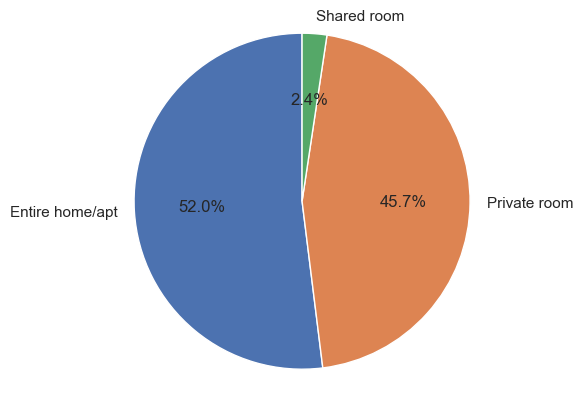

In [20]:
# define the label and proportion sizes
label_name = ['Entire home/apt','Private room','Shared room']
proportion_sizes = percentage_calculator(count_df['total_rooms'])

# plotting the pie chart
plt.pie(proportion_sizes, labels=label_name, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# show pie chart
plt.show()

#### **INSIGHT:**

- The pie chart depicts the proportion of room types owned by the Airbnb hosts.

- Among all room types, 'Entire home/apt' dominates the total rooms by slightly more than half, at 52%.

- The second highest proportion is held by 'Private room' which covers almost the other half of the pie, at 45.6%, leaving 2.4% remained for 'Shared room'.

- Thus, most Airbnb hosts own either 'Entire home/apt' or (and) 'Private room'.

#### 4.How Many Nights Do Customers Usually Stay In Airbnb Based On Room Types?

In [81]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48884 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48884 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  reviews_per_month               48884

In [94]:
# make a stacked bar plot
stacked_bar_data = clean_df.pivot_table(index='room_type',columns = 'neighbourhood_group',values ='minimum_nights', aggfunc='mean')
stacked_bar_data.head()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,5.957784,6.531492,10.539855,5.369752,6.238636
Private room,3.861751,5.541675,5.446880,5.120107,3.632979
Shared room,3.366667,7.644769,6.766667,4.232323,2.333333


Text(0.5, 1.0, 'Average Minimum Nights Spent in Rooms')

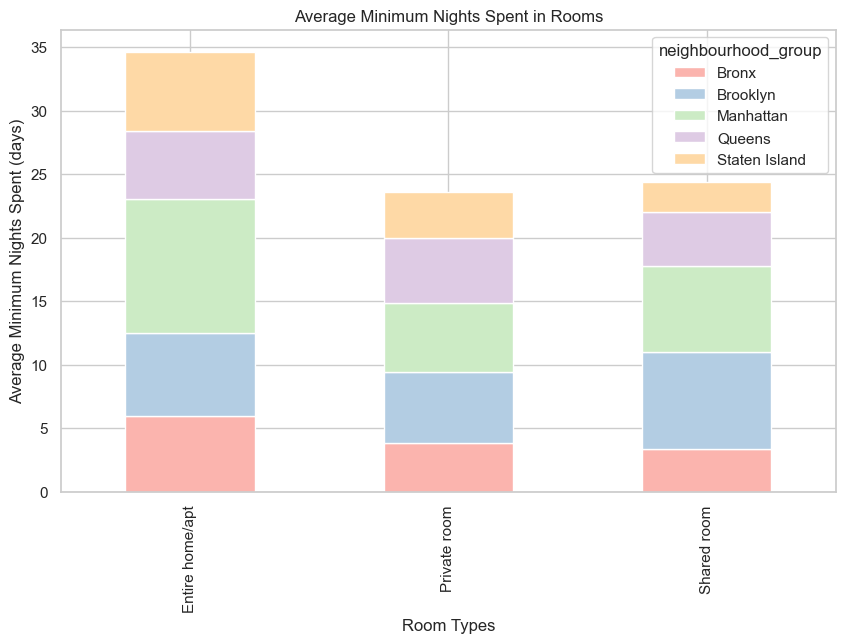

In [97]:
# create stacked bar plot
color_palette = sns.color_palette("Pastel1", len(stacked_bar_data.columns))
stacked_bar_data.plot(kind='bar', stacked=True, color=color_palette, figsize=(10, 6))
# labels for x & y axis
plt.xlabel('Room Types')
plt.ylabel('Average Minimum Nights Spent (days)')

# title of plot
plt.title('Average Minimum Nights Spent in Rooms')

#### **INSIGHT:**

- In general, Manhattan has the longest average minimum nights spent by the customers, followed by Brooklyn. Bronx, Queens, and Staten Island.
- Both Manhattan and Staten Island's Entire home/apt have the longest average minimum nights.
- Meanwhile, Manhattan, Brooklyn, and Queens have similar proportion of average minimum nights for private rooms.
- Lastly, Manhattan and Brooklyn dominate the proportion of average minimum nights for shared rooms.

### B.Room Prices Analysis

#### 5a. Comparison Of Prices Of All Room Types And Check Outliers

In [21]:
# show descriptive statistical values
def desc_stats(d,col_name):
    d_sorted = d.sort_values(by=col_name)
    group_name = ', '.join(map(str, d_sorted['neighbourhood_group'].unique()))

    # central tendency calculation
    rounded_mean = round(d_sorted[col_name].mean(),2)
    rounded_median = round(d_sorted[col_name].median(),2)

    # dispersion calculation: STD, IQR
    rounded_std = round(d_sorted[col_name].std(),2)
    # for IQR (interquartile range) calculation
    q1 = d_sorted[col_name].quantile(0.25)
    q3 = d_sorted[col_name].quantile(0.75)
    rounded_iqr = round(q3 -q1,2)
    # upper and lower boundaries
    upper_bound = round((rounded_median + 1.5*rounded_iqr),2)
    lower_bound = round((rounded_median - 1.5*rounded_iqr),2)

    # about data distribution and existence of extreme values indicators
    rounded_skew = round(d_sorted[col_name].skew(),2)
    rounded_kurtosis = round(d_sorted[col_name].kurtosis(),2)
    for name in d_sorted.columns:
        # to print only specific col_name
        if col_name == name:

            # remove quotation mark on column name (col_name)
            print(f"Descriptive statistics for prices in neighbourhood '{group_name}':")
            print(f"Mean: {rounded_mean}")
            print(f"Median: {rounded_median}")
            print(f"Standard deviation: {rounded_std}")
            print(f"Interquartile range: {rounded_iqr}")
            print(f"Skewness: {rounded_skew}")
            print(f"Kurtosis: {rounded_kurtosis}")

            # to calculate how many outlier data
            outlier_data = d_sorted[col_name][(d_sorted[col_name]< lower_bound)| (d_sorted[col_name]>upper_bound)]
            total_outlier = len(outlier_data)
            print(f'There are {total_outlier} outlier data.')
            break
        else:
            pass


In [22]:
# for Bronx neighbourhood
desc_stats(bronx_df,'price')

Descriptive statistics for prices in neighbourhood 'Bronx':
Mean: 87.58
Median: 65.0
Standard deviation: 106.73
Interquartile range: 54.0
Skewness: 12.51
Kurtosis: 249.11
There are 106 outlier data.


In [23]:
# for Brooklyn neighbourhood
desc_stats(brooklyn_df,'price')

Descriptive statistics for prices in neighbourhood 'Brooklyn':
Mean: 124.44
Median: 90.0
Standard deviation: 186.9
Interquartile range: 90.0
Skewness: 23.47
Kurtosis: 878.91
There are 1695 outlier data.


In [24]:
# for Manhattan neighbourhood
desc_stats(manhattan_df,'price')

Descriptive statistics for prices in neighbourhood 'Manhattan':
Mean: 196.88
Median: 150.0
Standard deviation: 291.39
Interquartile range: 125.0
Skewness: 15.95
Kurtosis: 399.51
There are 2148 outlier data.


In [25]:
# for Queens neighbourhood
desc_stats(queens_df,'price')

Descriptive statistics for prices in neighbourhood 'Queens':
Mean: 99.52
Median: 75.0
Standard deviation: 167.1
Interquartile range: 60.0
Skewness: 39.16
Kurtosis: 2201.19
There are 615 outlier data.


In [26]:
# for Staten Island neighbourhood
desc_stats(staten_df,'price')

Descriptive statistics for prices in neighbourhood 'Staten Island':
Mean: 114.81
Median: 75.0
Standard deviation: 277.62
Interquartile range: 60.0
Skewness: 15.09
Kurtosis: 260.15
There are 44 outlier data.


/var/folders/cz/m5jyzvh16g1_rspw_dq9fk_m0000gn/T/ipykernel_4063/1517620343.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=neighbourhood_df, palette="light:b")


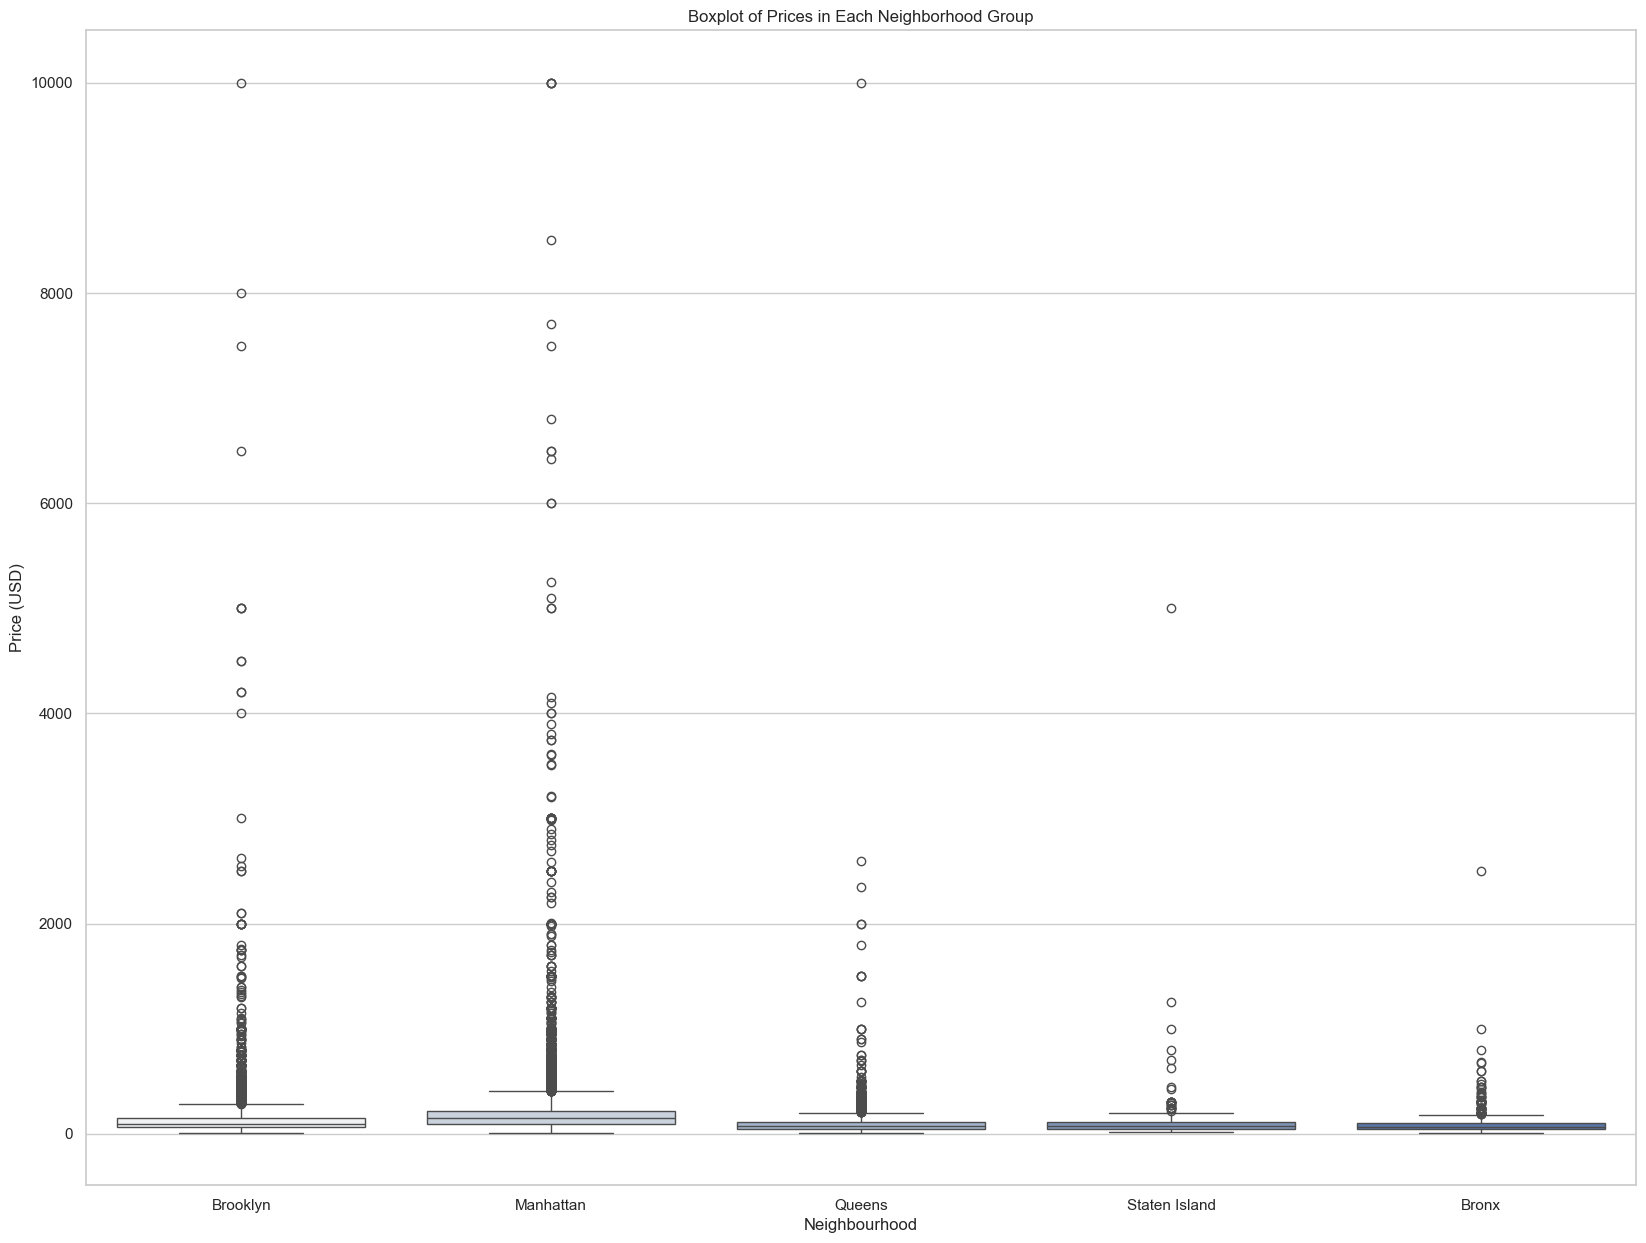

In [27]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(20, 15))
sns.boxplot(x='neighbourhood_group', y='price', data=neighbourhood_df, palette="light:b")
plt.xlabel('Neighbourhood')
plt.ylabel('Price (USD)')
plt.title('Boxplot of Prices in Each Neighborhood Group')
plt.show()

#### **INSIGHT:**

- The boxplots for Airbnb room prices describes the price distribution in each neighbourhood group.

- Among all neighbourhoods, Manhattan has the most widepsread price variation, followed by Brooklyn, Queens, Staten Island, and Bronx.

- This observation is supported by standard deviation (std) and interquartile range (iqr) calculation result from each group. Similar to the boxplot, the order of the neighbourhood group is the same from highest to lowest both std and iqr. Here is the details for each group:
    1. Manhattan(std:291.49, iqr:125.0)
    2. Brooklyn(std:186.96, iqr:90.0)
    3. Staten Island(std:277.62, iqr:60.0)
    4. Queens(std:167.13, iqr:60.0)
    5. Bronx(std:106.82, iqr:54.0)

- This result is reasonable since more various prices is originated from other factors such as market dynamics. Based on insights from point 1, popularity of neighbourhood can affect pricing strategies.


#### 5b. How To Confirm If There Is A Significant Difference In Prices Between The Neighbourhood Groups?

`Method`: ANOVA test

 - H0: there is no significant difference about the prices in all neighbourhood groups.

 - H1: there is a significant difference about the prices from one neighbourhood group to another.

   *H0 is rejected when p-value < 0.05*

In [28]:
# use the tables prepared in step 3 to conduct the calculation
# compare the average price values between the neighbourhood groups
print(f'Average Price of Airbnb rooms in Bronx: USD {bronx_df["price"].mean():.2f}')
print(f'Average Price of Airbnb rooms in Brooklyn: USD {brooklyn_df["price"].mean():.2f}')
print(f'Average Price of Airbnb rooms in Manhattan: USD {manhattan_df["price"].mean():.2f}')
print(f'Average Price of Airbnb rooms in Queens: USD {queens_df["price"].mean():.2f}')
print(f'Average Price of Airbnb rooms in Staten Island: USD {staten_df["price"].mean():.2f}')

Average Price of Airbnb rooms in Bronx: USD 87.58
Average Price of Airbnb rooms in Brooklyn: USD 124.44
Average Price of Airbnb rooms in Manhattan: USD 196.88
Average Price of Airbnb rooms in Queens: USD 99.52
Average Price of Airbnb rooms in Staten Island: USD 114.81


In [28]:
anova_price_neighborhood = stats.f_oneway(bronx_df["price"], brooklyn_df["price"], manhattan_df["price"],queens_df["price"],staten_df["price"])
print(f'The p-value:{anova_price_neighborhood.pvalue:.2f}')

The p-value:0.00


#### **INSIGHT:**

- The ANOVA test result rejects the null hypothesis since the p-value, that is equivalent to 0.00, is less than the critical value, 0.05.
- This means that the prices indeed differ depending on the neighbourhood groups.

#### 6. How is The Relationship Between The Airbnb Price And The Minimum Booked Night?
`Method`: Scatter Plot, Pearson Test
  - H0: No correlation if the correlation coefficient = 0
  - H1: Correlation exists if the correlation coefficient != 0  
    *H0 is rejected when p-value < 0.05*

In [29]:
# make the dataset first

price_vs_minbook = {'price':clean_df['price'], 'minimum_nights': clean_df['minimum_nights']}

pvm_df = pd.DataFrame(price_vs_minbook)

pvm_df

,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10
...,...,...
48890,70,2
48891,40,4
48892,115,10
48893,55,1


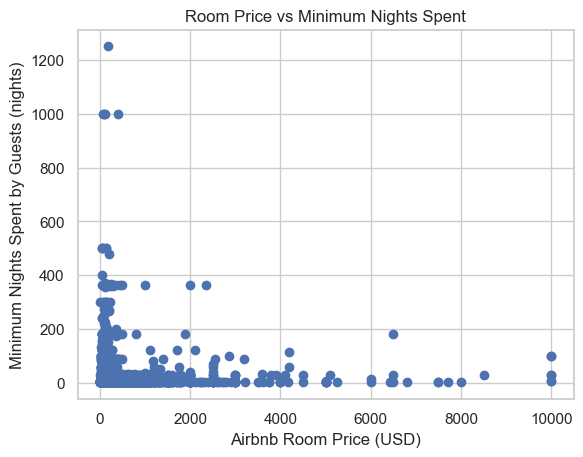

In [30]:
# construct a scatter plot to check relationship between
# Airbnb price and minimum nights stayed

# define x and y values
x_val = pvm_df['price']
y_val = pvm_df['minimum_nights']


# scatterplot
plt.scatter(x_val,y_val)

# Set labels and title
plt.xlabel('Airbnb Room Price (USD)')
plt.ylabel('Minimum Nights Spent by Guests (nights)')
plt.title('Room Price vs Minimum Nights Spent')

# Show the plot
plt.show()

In [31]:
# correlation tests between Airbnb Room Price and Minimum Nights Spent by Guests

# Pearson: linear relationship testing
corr_r, pval_p = stats.pearsonr(pvm_df['price'], pvm_df['minimum_nights'])

# Spearman: monotonic relationship testing
corr_rho, pval_s = stats.spearmanr(pvm_df['price'], pvm_df['minimum_nights'])

# Kendall-Tau: rank relationship testing
corr_tau, pval_k = stats.kendalltau(pvm_df['price'], pvm_df['minimum_nights'])

print(f"r-correlation coefficient: {corr_r:.2f}, p-value: {pval_p:.2f}")
print(f"rho-correlation coefficient: {corr_rho:.2f}, p-value: {pval_s:.2f}")
print(f"tau-correlation coefficient: {corr_tau:.2f}, p-value: {pval_k:.2f}")

r-correlation coefficient: 0.04, p-value: 0.00
rho-correlation coefficient: 0.10, p-value: 0.00
tau-correlation coefficient: 0.07, p-value: 0.00


#### **INSIGHT:**

- The scatter plot gives a hint that the data distribution concentrates at price range 0-2500 USD. As the price increases, the density of data decreases.

- Based on the observation from previous point, there is a weak negative correlation between the variables.

- Based on the Pearson, Spearman, and Kendall-tau test results, there is a weak positive correlation with a statistical significance due to p-value < 0.05. This result implies:

  " as Airbnb prices increase, the minimum nights guests stay also tend to increase, suggesting a (very weak) positive correlation between these variables. "


### C.Customer Review Analysis

#### 7. What Is The Relationship Between The Number Of Reviews To Room Availability? 

`method`: Line graph, Pearson Test  
   - H0: No correlation if the correlation coefficient = 0  
   - H1: Correlation exists if the correlation coefficient != 0   
    *H0 is rejected when p-value < 0.05*

In [39]:
# group data based on neighborhood groups
reviews_room_relation = clean_df.groupby(["neighbourhood_group",'room_type'])[['availability_365','number_of_reviews']].mean()
# to make neighborhood groups as a column
reviews_room_relation = reviews_room_relation.reset_index()
reviews_room_relation.columns

Index(['neighbourhood_group', 'room_type', 'availability_365',
       'number_of_reviews'],
      dtype='object')

In [40]:
reviews_room_relation.head()

,neighbourhood_group,room_type,availability_365,number_of_reviews
0,Bronx,Entire home/apt,158.000000,30.678100
1,Bronx,Private room,171.399386,24.972350
2,Bronx,Shared room,154.216667,7.200000
3,Brooklyn,Entire home/apt,97.207679,27.947792
4,Brooklyn,Private room,99.912206,21.068635


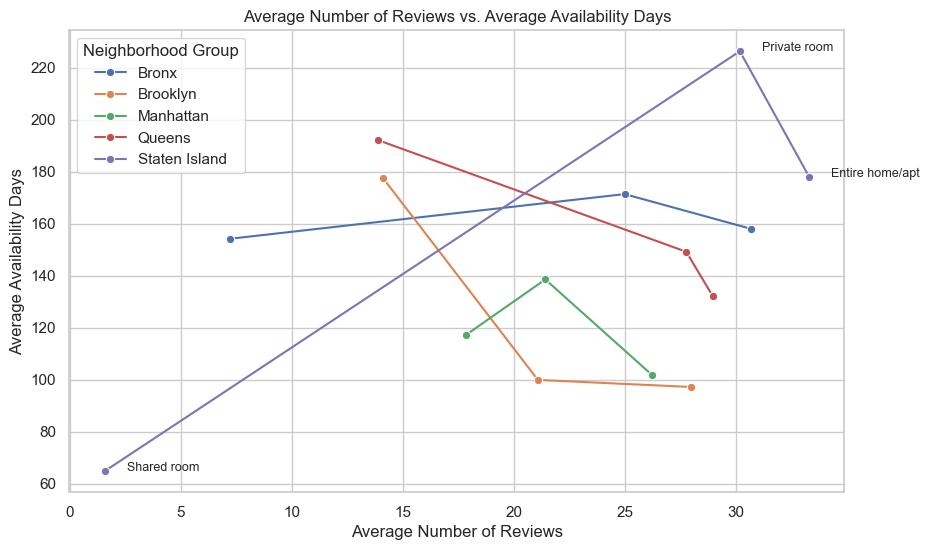

In [49]:
# line graph plot
plt.figure(figsize=(10,6))
for group in reviews_room_relation['neighbourhood_group'].unique():
    subset = reviews_room_relation[reviews_room_relation['neighbourhood_group'] == group]
    sns.lineplot(
        x='number_of_reviews',
        y='availability_365',
        data=subset,
        marker='o',
        label=group
    )
# Annotate each point with the room_type
for i in range(subset.shape[0]):
    plt.text(
        subset['number_of_reviews'].iloc[i] + 1,  # Shift text slightly right
        subset['availability_365'].iloc[i],      # Align text with the point
        subset['room_type'].iloc[i],
        fontsize=9
    )    

# Add labels and title
plt.title('Average Number of Reviews vs. Average Availability Days')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Average Availability Days')
plt.legend(title='Neighborhood Group')
plt.show()


#### 8. Who Are The Top 5 Hosts With Most Reviews?
- Additional investigation: How is their performance in terms of room availability and in which neighborhoods are they located?

In [52]:
# prepare the dataframe
most_reviewed_hosts = clean_df.groupby('host_name').number_of_reviews.sum().reset_index()
# sort based on number of reviews descending order
most_reviewed_hosts.sort_values(by='number_of_reviews',ascending = False,inplace = True)
# get only top 5
top_5_most_reviewed = most_reviewed_hosts.iloc[0:5,:]
top_5_most_reviewed

,host_name,number_of_reviews
7134,Michael,11081
2375,David,8103
4988,John,7223
4633,Jason,6522
314,Alex,6204


In [78]:
# show total host in dataset
print(f"total hosts in this dataset: {len(most_reviewed_hosts.host_name.unique())} people")

total hosts in this dataset: 11451 people


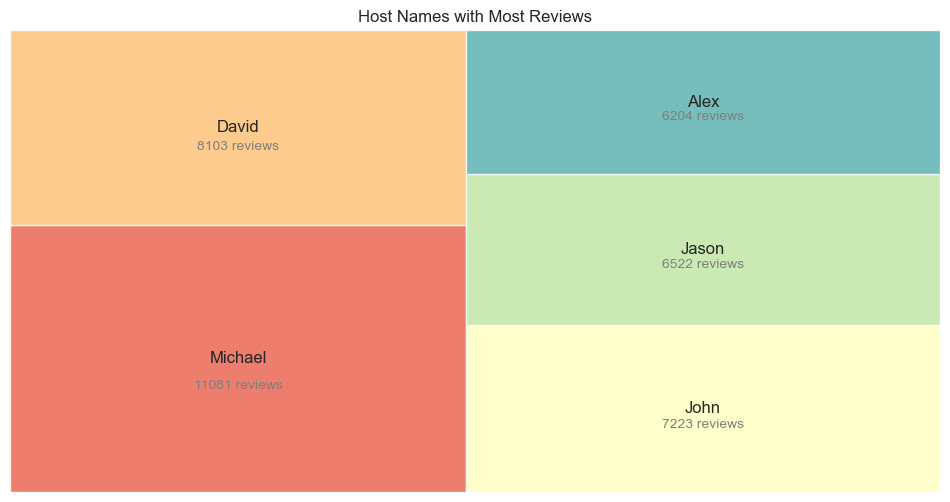

In [76]:
# make a treemap plot
plt.figure(figsize=(12,6))
# define size and labels
sizes = top_5_most_reviewed['number_of_reviews']
labels = top_5_most_reviewed['host_name']

# define color palette
palette = sns.color_palette("Spectral", len(top_5_most_reviewed['host_name']))

# Plot the treemap
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=palette)

# Add annotations for sizes slightly lower than the center
values = top_5_most_reviewed['number_of_reviews']
rects = squarify.normalize_sizes(sizes, 100, 100)  # Normalize for display
rects = squarify.squarify(rects, 0, 0, 100, 100)   # Create the layout

for rect, size in zip(rects, values):
    plt.text(
        rect['x'] + rect['dx'] / 2,          # x coordinate
        rect['y'] + rect['dy'] / 2 - rect['dy'] * 0.1,  # y coordinate (lowered by 10% of the rectangle's height)
        str(size) + ' reviews',                           # text (size value)
        ha='center', va='center',            # center alignment
        fontsize=10, color='grey'           # font size and color
    )
# Customize the plot
plt.title('Host Names with Most Reviews')
plt.axis('off')  # Turn off the axis
plt.show()

#### **INSIGHT:**

- The treemap shows top 5 hosts, out of 11,451 hosts, with most reviews in all of their listings:
- Michael has the largest square size with 11,081 total reviews. The second popular host is David with 8,103 reviews, followed by John at 7,223 reviews, then Jason at 6,522 reviews, and Alex at 6,204 reviews.
 


## 5. CONCLUSION



**IMPORTANT POINTS FROM ANALYSIS:**

To sum up, Manhattan and Brooklyn are the most popular Airbnb booking neighbourhood groups especially for 'Private room' and 'Entire home/apt' since the average availability of the rooms are less than 120 days.

Meanwhile, the 'Shared room' in Staten Island is the most favored among all neighbourhood groups since it has the least average availability of rooms in the year, at approximately 65 days.

On the other hand, Queens and Bronx are not considered favorite Airbnb booking sites as the average availability of the rooms for all room types are greater than 120 days.

Furthermore, Manhattan and Brooklyn also have the relatively large Airbnb price deviations compared to other regions. This result indicates the existence of other factors that make one neighbourhood group having significantly higher prices than the other which is confirmed by the ANOVA TEST result.

Note: Manhattan's price std (highest) -> 291.49 USD, Brooklyn's price std (third) -> 186.96 USD.



**SOLUTION FOR NEXT HOSTING STRATEGIES:**

Setting up more listings on Staten Island for 'Shared room' can fulfill the observed demand, leading to potential higher prices. Here are the consideration points:

- The geospatial heatmap distribution of popular Airbnb rooms suggests that Staten Island has less Airbnb listing density compared to Manhattan and Brooklyn although its 'Shared room' is most on demand.

- The pie chart points out how low 'Shared room' proportion is compared to other room types in the neighbourhoods. So, the competition for booking is also less.

- It is possible to set up high price on the listing since the guests tend to stay in longer periods for more expensive Airbnb rooms.
